# Importações

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import json
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
sns.set_style('darkgrid')


# Lendo o arquivo CSV

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


# Matriz de Correlações

<Axes: >

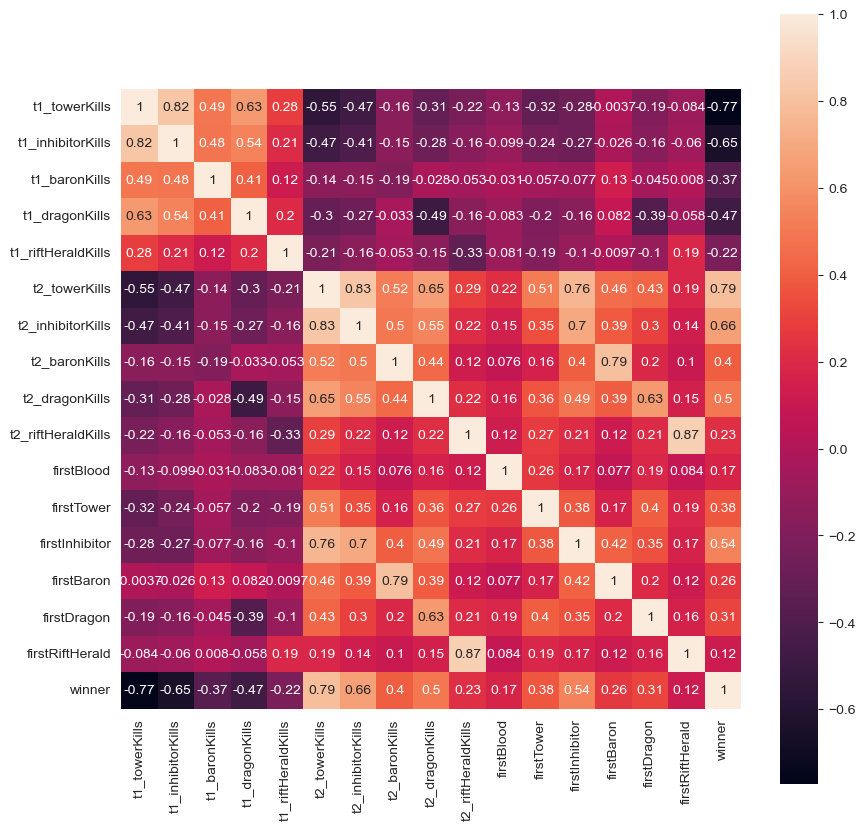

In [4]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(data[['t1_towerKills','t1_inhibitorKills','t1_baronKills','t1_dragonKills','t1_riftHeraldKills','t2_towerKills','t2_inhibitorKills','t2_baronKills','t2_dragonKills','t2_riftHeraldKills','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald', 'winner']].corr(),annot=True,square=True)

# Pré-processamento de Dados, Separação para Teste/Treino e Normalização.

In [5]:
X = data[['t1_towerKills','t1_inhibitorKills','t1_baronKills','t1_dragonKills','t1_riftHeraldKills','t2_towerKills','t2_inhibitorKills','t2_baronKills','t2_dragonKills','t2_riftHeraldKills','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']]
y = data['winner']
y = y.replace({1: 0})
y = y.replace({2:1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Modelo de Regressão Linear

In [6]:
logmodel = LogisticRegression()

# Normalizando as Entradas

In [7]:
X = scaler.fit_transform(X)

# Resultados do Modelo de Regressão Linear utilizando cross_folding_validation

In [8]:
num_folds = 10
kf = KFold(n_splits=num_folds)
scores = cross_val_score(logmodel, X, y, cv=kf, scoring='accuracy')
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(f'Média da acurácia: {mean_accuracy}')
print(f'Desvio padrão da acurácia: {std_accuracy}')

Média da acurácia: 0.9609438725966208
Desvio padrão da acurácia: 0.003042944358112186


# Utilizando train_test_split

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      6426
           1       0.97      0.96      0.96      6447

    accuracy                           0.96     12873
   macro avg       0.96      0.96      0.96     12873
weighted avg       0.96      0.96      0.96     12873

A acurácia é  0.9636448380330925


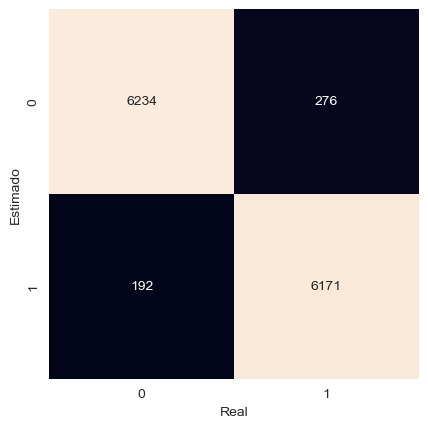

In [9]:
logmodel.fit(X_train_scaled, y_train)
train_est_y = logmodel.predict(X_test_scaled)
mat = confusion_matrix(y_test, train_est_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Real')
plt.ylabel('Estimado')
print(classification_report(y_test, train_est_y))
print('A acurácia é ', accuracy_score(train_est_y, y_test))

# Modelo Classificador KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


# Resultados do Modelo Classificador KNN utilizando cross_folding_validation

In [28]:
scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(f'Média da acurácia: {mean_accuracy}')
print(f'Desvio padrão da acurácia: {std_accuracy}')

Média da acurácia: 0.9584385317537386
Desvio padrão da acurácia: 0.002705066668709299


# Utilizando train_test_split

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      6426
           1       0.95      0.97      0.96      6447

    accuracy                           0.96     12873
   macro avg       0.96      0.96      0.96     12873
weighted avg       0.96      0.96      0.96     12873

A acurácia é  0.9557989590616018


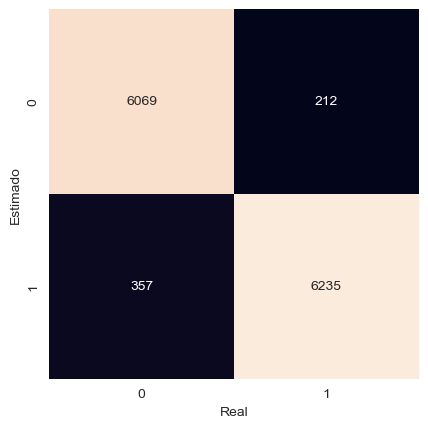

In [29]:
knn.fit(X_train_scaled, y_train)
train_est_y = knn.predict(X_test_scaled)
mat = confusion_matrix(y_test, train_est_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Real')
plt.ylabel('Estimado')
print(classification_report(y_test, train_est_y))
print('A acurácia é ', accuracy_score(train_est_y, y_test)) 

# Modelo Classificador RandomForest

In [33]:
forest = RandomForestClassifier(n_jobs=4)

# Resultados do Modelo Classificador RandomForest utilizando cross_folding_validation

In [34]:
scores = cross_val_score(forest, X, y, cv=kf, scoring='accuracy')
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(f'Média da acurácia: {mean_accuracy}')
print(f'Desvio padrão da acurácia: {std_accuracy}')

Média da acurácia: 0.9711788696834336
Desvio padrão da acurácia: 0.002749598645625112


# Utilizando train_test_split

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6426
           1       0.97      0.97      0.97      6447

    accuracy                           0.97     12873
   macro avg       0.97      0.97      0.97     12873
weighted avg       0.97      0.97      0.97     12873

A acurácia é  0.9713353530645538


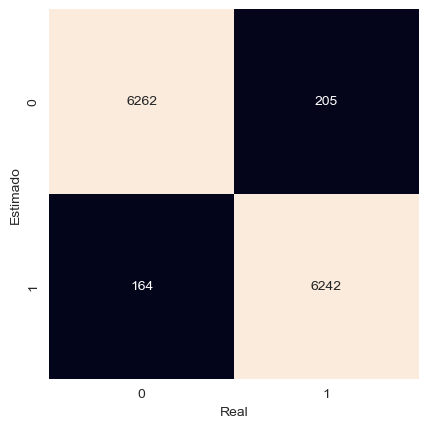

In [36]:
forest.fit(X_train_scaled, y_train)
train_est_y = forest.predict(X_test_scaled)
mat = confusion_matrix(y_test, train_est_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Real')
plt.ylabel('Estimado')
print(classification_report(y_test, train_est_y))
print('A acurácia é ', accuracy_score(train_est_y, y_test))

# Modelo Classificador Multilayer Perceptron

In [16]:
print('Ajustando a topologia...')
num_x = X_train_scaled.shape[1]
num_y = 1
print('Entradas = %i\nSaídas = %i' % (num_x, num_y))

Ajustando a topologia...
Entradas = 16
Saídas = 1




Treinamento...
Iteration 1, loss = 0.16552952
Iteration 2, loss = 0.09730549
Iteration 3, loss = 0.09086281
Iteration 4, loss = 0.08791767
Iteration 5, loss = 0.08585443
Iteration 6, loss = 0.08317583
Iteration 7, loss = 0.08156113
Iteration 8, loss = 0.08035937
Iteration 9, loss = 0.07903604
Iteration 10, loss = 0.07824746
Iteration 11, loss = 0.07744846
Iteration 12, loss = 0.07643518
Iteration 13, loss = 0.07632296
Iteration 14, loss = 0.07531475
Iteration 15, loss = 0.07540116
Iteration 16, loss = 0.07440275
Iteration 17, loss = 0.07397181
Iteration 18, loss = 0.07422314
Iteration 19, loss = 0.07371300
Iteration 20, loss = 0.07323491
Iteration 21, loss = 0.07323988
Iteration 22, loss = 0.07277870
Iteration 23, loss = 0.07250578
Iteration 24, loss = 0.07276918
Iteration 25, loss = 0.07236405
Iteration 26, loss = 0.07230915
Iteration 27, loss = 0.07190895
Iteration 28, loss = 0.07153471
Iteration 29, loss = 0.07163862
Iteration 30, loss = 0.07128499
Iteration 31, loss = 0.07107225


Text(0, 0.5, 'perda')

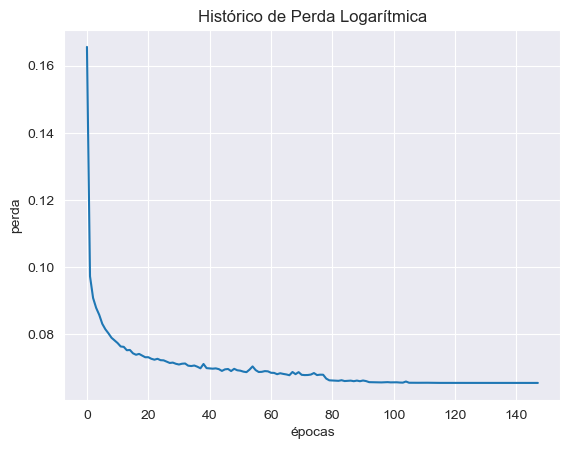

In [17]:
while(True):
  num_hidden_layers = int(input('Número de camadas ocultas: '))
  if(num_hidden_layers>0):
    break

if(num_hidden_layers==1):
  while(True):
    topology = [int(input('Neurônios na camada oculta: '))]
    if(topology[0]>0):
      break
else:
  topology = []
  for i in range(num_hidden_layers):
    while(True):
      num = int(input('Neurônios na %iª camada oculta: ' % (i+1)))
      if(num>0):
        topology.append(num)
        break

print('\n\nTreinamento...')

epochs = int(input('Número de épocas de treinamento: '))

# inicialização do modelo
Model = MLPClassifier(hidden_layer_sizes=tuple(topology), tol=0.0001, activation='relu' ,max_iter=350, alpha=0.1,
                      solver='sgd', learning_rate_init=0.015, learning_rate='adaptive', verbose=1,  random_state=0) # verbose=1 exibe o log de treinamento

topology.insert(0, num_x)
topology.append(num_y)
modelMLP = Model.fit(X_train_scaled, y_train)

print(modelMLP)
print('Topologia da MLP =', topology)

# exibindo a curva de perda logarítmica
plt.plot(modelMLP.loss_curve_)
plt.title('Histórico de Perda Logarítmica')
plt.xlabel('épocas')
plt.ylabel('perda')

# Resultados do MLPClassifier utilizando train_test_split

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      6426
           1       0.98      0.97      0.97      6447

    accuracy                           0.97     12873
   macro avg       0.97      0.97      0.97     12873
weighted avg       0.97      0.97      0.97     12873

A acurácia é 0.9705585333644061


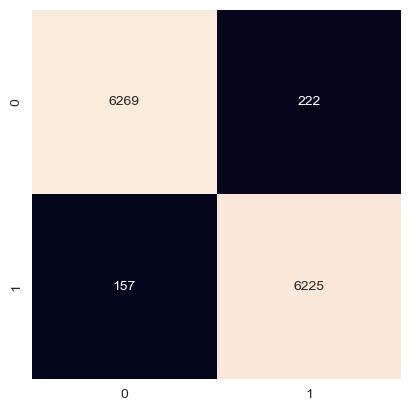

In [18]:
train_est_y = modelMLP.predict(X_test_scaled)
mat = confusion_matrix(y_test, train_est_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
print(classification_report(y_test, train_est_y))
print('A acurácia é',accuracy_score(train_est_y, y_test)) 

# Utilizando cross_folding_validation

In [19]:
scores = cross_val_score(modelMLP, X, y, cv=kf, scoring='accuracy')
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(f'Média da acurácia: {mean_accuracy}')
print(f'Desvio padrão da acurácia: {std_accuracy}')

Iteration 1, loss = 0.15488356
Iteration 2, loss = 0.09440980
Iteration 3, loss = 0.08956665
Iteration 4, loss = 0.08632551
Iteration 5, loss = 0.08354576
Iteration 6, loss = 0.08140482
Iteration 7, loss = 0.07981518
Iteration 8, loss = 0.07851612
Iteration 9, loss = 0.07716910
Iteration 10, loss = 0.07651645
Iteration 11, loss = 0.07581923
Iteration 12, loss = 0.07483240
Iteration 13, loss = 0.07466087
Iteration 14, loss = 0.07439946
Iteration 15, loss = 0.07377830
Iteration 16, loss = 0.07391599
Iteration 17, loss = 0.07321643
Iteration 18, loss = 0.07308122
Iteration 19, loss = 0.07255799
Iteration 20, loss = 0.07259746
Iteration 21, loss = 0.07222227
Iteration 22, loss = 0.07211160
Iteration 23, loss = 0.07166240
Iteration 24, loss = 0.07156141
Iteration 25, loss = 0.07141209
Iteration 26, loss = 0.07124199
Iteration 27, loss = 0.07113533
Iteration 28, loss = 0.07092904
Iteration 29, loss = 0.07063454
Iteration 30, loss = 0.07050033
Iteration 31, loss = 0.07054555
Iteration 32, los

# Modelo de Rede Neural do Tensorflow

In [20]:

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


# Utilizando train_test_split

In [26]:
ann.fit(X_train_scaled, y_train, batch_size=3320, epochs=2000)

Epoch 1/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9852
Epoch 2/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9842
Epoch 3/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9854
Epoch 4/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 0.9844
Epoch 5/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9849
Epoch 6/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 0.9849
Epoch 7/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9850
Epoch 8/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 0.9855
Epoch 9/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 0.9839
Epoch 10/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9848